## 1. Key Concepts

- **Time Series** → Data ordered in time (e.g., Jan → Feb → Mar …).
- **Trend** → Long-term movement (upward, downward, or flat).
- **Seasonality** → Regular repeating patterns (daily, weekly, yearly).
- **Cyclic Patterns** → Irregular, longer-term fluctuations (e.g., economic cycles).
- **Noise** → Random fluctuations that cannot be explained.

---

## 2. Common Forecasting Methods (from simplest to most advanced)

### **A. Baseline & Naïve Methods**
- **Mean Forecast** → Predicts the average of past values.
- **Naïve Forecast** → Predicts that the next value = last observed value.
- **Seasonal Naïve** → Predicts using last season's value (good for strong seasonality).

### **B. Classical Statistical Models**
- **Moving Average (MA)** → Smooths data by averaging recent observations.
- **Exponential Smoothing (ETS Family)**  
  - **Simple Exponential Smoothing (SES)** → Good for no trend/seasonality.  
  - **Holt’s Linear Trend** → Handles trend.  
  - **Holt-Winters (Triple Exponential)** → Handles trend + seasonality.
- **AR, MA, ARMA, ARIMA Models**  
  - **AR (AutoRegressive)** → Uses past values.  
  - **MA (Moving Average)** → Uses past forecast errors.  
  - **ARMA** → Combines AR + MA (stationary series only).  
  - **ARIMA** → ARMA + differencing to handle trend.  
- **SARIMA** → ARIMA with seasonality.
- **SARIMAX** → SARIMA + external variables.

### **C. Machine Learning Models**
- Regression Models (using lag features).
- Random Forest, Gradient Boosting (**XGBoost**, **LightGBM**, **CatBoost**).
- Support Vector Regression (**SVR**).

### **D. Deep Learning Models**
- **RNN** (Recurrent Neural Networks).
- **LSTM** (Long Short-Term Memory networks) — handles long-term dependencies.
- **GRU** (Gated Recurrent Units).
- **Temporal Convolutional Networks (TCN)**.
- **Transformers for Time Series**.

### **E. Hybrid & Advanced**
- **Facebook Prophet** → Easy to use, good for business data with seasonality/trend.
- **N-BEATS, DeepAR, TFT (Temporal Fusion Transformer)** → State-of-the-art.
- **Hybrid Models** → Combine statistical + ML/DL.

---

## 3. Steps to Do Time Series Forecasting
1. **Understand your data** → Plot it, check for trend, seasonality.
2. **Preprocess** → Handle missing values, remove outliers, scale if needed.
3. **Stationarize** (for ARIMA-type models) → Differencing or transformations.
4. **Choose a model** → Based on data characteristics.
5. **Train & Validate** → Use rolling forecast origin or walk-forward validation.
6. **Evaluate** → Metrics: MAE, RMSE, MAPE.
7. **Forecast & Interpret** → Predict future points and visualize.


| Method | Best For | Handles Trend? | Handles Seasonality? | Pros | Cons | Python Packages |
|--------|----------|----------------|----------------------|------|------|-----------------|
| **Mean Forecast** | Very simple baseline | ❌ | ❌ | Easy to compute, quick baseline | Ignores patterns | `numpy`, `pandas` |
| **Naïve Forecast** | Short-term prediction | ❌ | ❌ | No training needed | Poor for volatile data | `pandas` |
| **Seasonal Naïve** | Strong seasonality | ❌ | ✅ | Good for seasonal data | Fails if seasonality changes | `pandas` |
| **Moving Average (MA)** | Smoothing noise | ❌ | ❌ | Simple, good for noise | Lags behind trends | `pandas` |
| **Simple Exponential Smoothing (SES)** | No trend or seasonality | ❌ | ❌ | Smooths data well | Won’t follow trend | `statsmodels` |
| **Holt’s Linear Trend** | Data with trend | ✅ | ❌ | Captures trend | Not for seasonality | `statsmodels` |
| **Holt-Winters** | Trend + seasonality | ✅ | ✅ | Great for regular patterns | Sensitive to changes | `statsmodels` |
| **AR (AutoRegressive)** | Stationary data | ❌ | ❌ | Good for autocorrelation | No seasonality | `statsmodels` |
| **MA (Moving Average)** | Stationary data | ❌ | ❌ | Models shocks well | No trend | `statsmodels` |
| **ARMA** | Stationary, no seasonality | ❌ | ❌ | Combines AR + MA | Needs stationarity | `statsmodels` |
| **ARIMA** | Non-stationary data | ✅ | ❌ | Handles trend | No direct seasonality | `statsmodels` |
| **SARIMA** | Seasonal + trend | ✅ | ✅ | Flexible | Many parameters | `statsmodels` |
| **SARIMAX** | Seasonal + exogenous vars | ✅ | ✅ | Adds external effects | Complex | `statsmodels` |
| **Facebook Prophet** | Business data | ✅ | ✅ | Easy, interpretable | Less accurate for short data | `prophet` |
| **XGBoost/LightGBM** | Large datasets | ✅ | ✅ | Powerful ML | Needs feature engineering | `xgboost`, `lightgbm` |
| **LSTM / GRU** | Long sequences | ✅ | ✅ | Captures complex patterns | Needs lots of data | `tensorflow`, `pytorch` |
| **Temporal Fusion Transformer (TFT)** | Complex, multi-variate | ✅ | ✅ | State-of-the-art | High complexity | `pytorch-forecasting` |


# Let's dive in a dataset and apply all models.
Airline Passengers (monthly, 1949–1960) dataset as It has clear trend + seasonality, so it’s perfect to demo baselines, ETS (Holt-Winters), and SARIMA. I’ll also include optional cells for Prophet and an XGBoost baseline with lag features.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN
from tensorflow.keras.optimizers import Adam

from math import sqrt
from prophet import Prophet
from darts import TimeSeries
from darts.models import NBEATSModel
#from darts.models import DeepARModel
from darts.models import TFTModel
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor

In [ ]:
!pip install u8darts


ERROR: Could not find a version that satisfies the requirement u8darts==0.42.0 (from versions: 0.0.1.dev0, 0.1.0, 0.2.0, 0.2.1, 0.2.2, 0.3.0, 0.4.0, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.15.0, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.19.0, 0.20.0, 0.21.0, 0.22.0, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.27.1, 0.27.2, 0.28.0, 0.29.0, 0.30.0, 0.31.0, 0.32.0, 0.33.0, 0.34.0, 0.35.0, 0.36.0)
ERROR: No matching distribution found for u8darts==0.42.0


In [ ]:
!pip install prophet
!pip install xgboost
!pip install lightgbm


In [ ]:
!pip install catboost

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Excel file
df = pd.read_excel('/content/drive/MyDrive/bookings.csv.xlsx')

# Display first few rows
df.head()

,Year,Month,Bookings
0,2006,Jan,383
1,2006,Feb,366
2,2006,Mar,250
3,2006,Apr,318
4,2006,May,334


In [ ]:
# Step 2: Combine 'Year' and 'Month' into a datetime column
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')

# Step 3: Set datetime as index and sort
df.set_index('date', inplace=True)
df = df[['Bookings']].asfreq('MS')  # MS = Month Start

In [ ]:
df2=df
df.head()

,Bookings
date,
2006-01-01,383
2006-02-01,366
2006-03-01,250
2006-04-01,318
2006-05-01,334


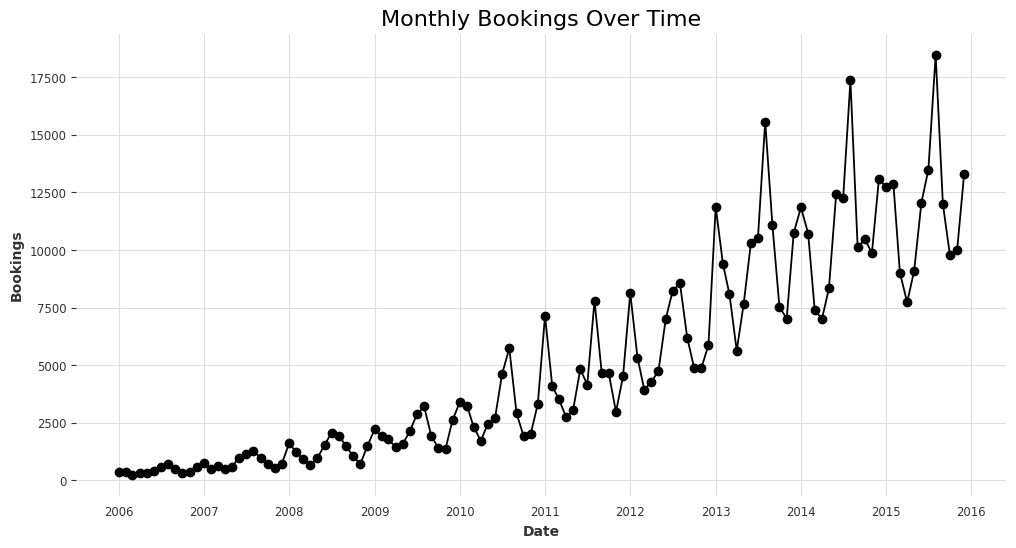

In [ ]:
#  Step 1 — Line plot of the whole series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Bookings'], marker='o', linestyle='-')
plt.title("Monthly Bookings Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Bookings")
plt.grid(True)
plt.show()


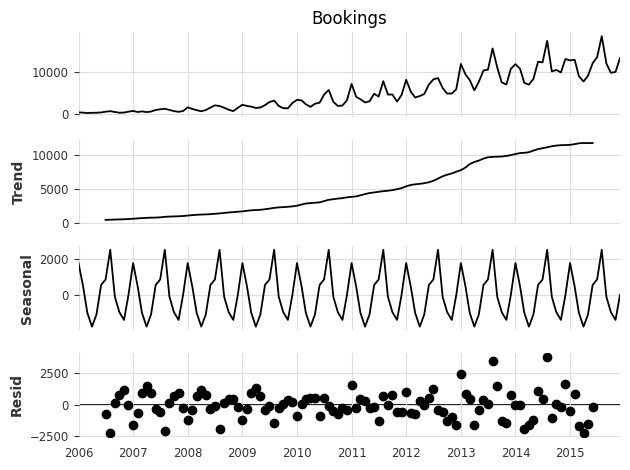

In [ ]:
# Step 2 — Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df['Bookings'], model='additive', period=12)
decomp.plot()
plt.show()

### 1. Top plot – Original series

The data shows a steady growth starting around 2006, becoming much steeper after ~2012.

There are regular up-and-down movements within each year → hints at seasonality.

A few large spikes in later years.

### 2. Trend

Clear upward trend — bookings consistently increase over the years.

Slope is steeper in later years, suggesting accelerating growth (could be due to business expansion, increased demand, etc.).

### 3. Seasonal

Strong yearly seasonality: peaks and dips occur at the same months every year.

The amplitude (size of the seasonal swing) is consistent across years.

Example: bookings likely peak in certain months (maybe summer/winter holiday season) and drop in others.

### 4. Residuals

Mostly scattered around zero → model explains most patterns via trend + seasonality.

Some larger deviations in later years, suggesting occasional unusual events or anomalies.

🔹 What are Residuals?

Residuals = Actual values – Predicted values

They represent the "leftover" part of the data that the model couldn’t explain.

🔹 Your observation

“Mostly scattered around zero → model explains most patterns via trend + seasonality.”

✅ Correct.

If residuals are centered around zero with no clear pattern, it means the model is capturing the main structure (trend + seasonality).

Good models should leave behind only random noise.

“Some larger deviations in later years, suggesting occasional unusual events or anomalies.”

✅ Also correct.

If residuals show spikes in certain periods, it may indicate:

Unexpected events (holidays, strikes, pandemics, etc.)

Model drift (the model fit degrades over time if new patterns emerge).

Outliers (data entry mistakes or rare shocks).

### Key insights for forecasting

You need a model that handles both trend and strong yearly seasonality.

Best candidates:

  1. Holt-Winters (Triple Exponential Smoothing)

  2. SARIMA/SARIMAX (Seasonal ARIMA)

  3. Prophet (handles growth + seasonality well)

# Data Cleaning

## 1. Check for missing dates or values


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check if all months are present
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS')
missing_dates = full_range.difference(df.index)

print("Missing dates:", missing_dates)

Bookings    0
dtype: int64
Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='MS')


## 2. Handle missing values

In [ ]:
# If any missing bookings, fill with interpolation
df['Bookings'] = df['Bookings'].interpolate(method='linear')


## 3. Remove duplicates

In [ ]:
df = df[~df.index.duplicated(keep='first')]


## 4. Ensure correct data types


In [ ]:
df.index = pd.to_datetime(df.index)  # Make sure index is datetime
df['Bookings'] = pd.to_numeric(df['Bookings'], errors='coerce')  # Force numeric


## 5. Optional – Outlier handling

In [ ]:
# Z-score method
z_scores = (df['Bookings'] - df['Bookings'].mean()) / df['Bookings'].std()
df.loc[np.abs(z_scores) > 3, 'Bookings'] = np.nan
df['Bookings'] = df['Bookings'].interpolate()

# Step 3 — Time Series Diagnostics (for arima family)

Before picking a model, we need to check:

  1. Stationarity — Does the mean/variance stay constant over time?

  If not, we may need differencing (for ARIMA).

  2. Seasonality & trend strength — Already seen from your decomposition, but we’ll quantify it.

  3. Autocorrelation structure — Using ACF/PACF plots.

ADF Statistic: 0.5990451665952501
p-value: 0.9875920705048458
Series is NOT stationary


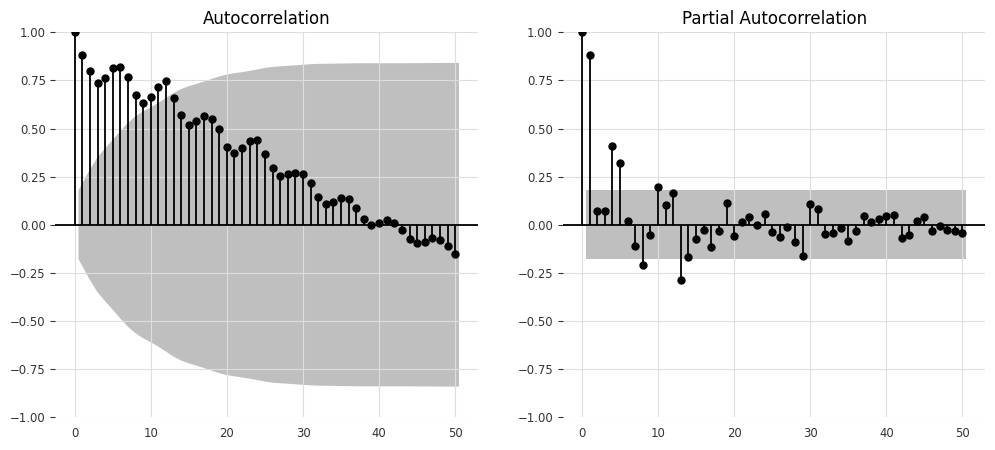

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Augmented Dickey-Fuller Test (stationarity check)
result = adfuller(df['Bookings'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] <= 0.05:
    print("Series is likely stationary")
else:
    print("Series is NOT stationary")

# ACF and PACF plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(df['Bookings'], lags=50, ax=plt.gca())
plt.subplot(1, 2, 2)
plot_pacf(df['Bookings'], lags=50, ax=plt.gca())
plt.show()


Given:

  1. Non-stationary series

  2. Trend + strong yearly seasonality

  3. Likely AR(1) structure

We should:

  1. Difference the series (both regular differencing for trend and seasonal differencing for yearly cycles).

  2. Re-run the ADF test to confirm stationarity.

  3. Then fit models — SARIMA, ETS, or Prophet.

## 1. First-order differencing (remove trend)

Since your series has a clear upward trend, we subtract each value from the previous one:

In [ ]:
df['Bookings_diff1'] = df['Bookings'] - df['Bookings'].shift(1)

#df['Bookings_diff2'] = df['Bookings_diff1'] - df['Bookings_diff1'].shift(1)


## 2. Seasonal differencing (remove yearly cycle)

Your seasonality appears to be 12 months, so we do:

In [ ]:
df['Bookings_diff12'] = df['Bookings'] - df['Bookings'].shift(12)


## 3. Combined differencing (trend + seasonality)

Sometimes we do seasonal differencing first, then regular differencing:

In [ ]:
df['Bookings_diff'] = df['Bookings_diff12'] - df['Bookings_diff12'].shift(1)


## 4. Drop missing values

Because differencing creates NaNs for the first row

In [ ]:
df_diff = df['Bookings_diff'].dropna()


# 5. Re-run ADF test

We check if it’s stationary now:

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

#Goal: p-value < 0.05 → Stationary ✅

ADF Statistic: -4.164509748751652
p-value: 0.0007562178970159482


## 6. Plot new ACF/PACF

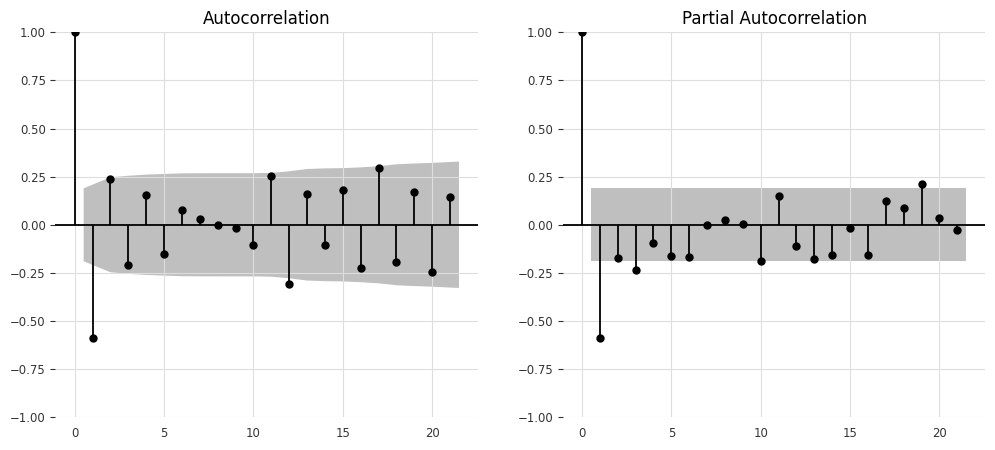

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df_diff, ax=ax[0])
plot_pacf(df_diff, ax=ax[1])
plt.show()


In [ ]:
df.head()

,Bookings,Bookings_diff1,Bookings_diff12,Bookings_diff
date,,,,
2006-01-01,383.0,NaN,NaN,NaN
2006-02-01,366.0,-17.0,NaN,NaN
2006-03-01,250.0,-116.0,NaN,NaN
2006-04-01,318.0,68.0,NaN,NaN
2006-05-01,334.0,16.0,NaN,NaN


## Train Test Split

In [ ]:
df = df.asfreq('MS')  # Ensure monthly start frequency

# Use only the target column
y = df['Bookings_diff']


# Train-test split: last 12 months for testing
train = y[:-12]
test = y[-12:]
df.head(3)

,Bookings,Bookings_diff1,Bookings_diff12,Bookings_diff
date,,,,
2006-01-01,383.0,NaN,NaN,NaN
2006-02-01,366.0,-17.0,NaN,NaN
2006-03-01,250.0,-116.0,NaN,NaN


In [ ]:
# =======================
# Helper Functions
# =======================
def plot_forecast(train, test, forecast, title):
    plt.figure(figsize=(10,4))
    plt.plot(train.index, train, label="Train")
    plt.plot(test.index, test, label="Test", color='orange')
    plt.plot(test.index, forecast, label="Forecast", color='red')
    plt.title(title)
    plt.legend()
    plt.show()

def evaluate(test, forecast):
    mae = mean_absolute_error(test, forecast)
    rmse = math.sqrt(mean_squared_error(test, forecast))
    return mae, rmse

results = []

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


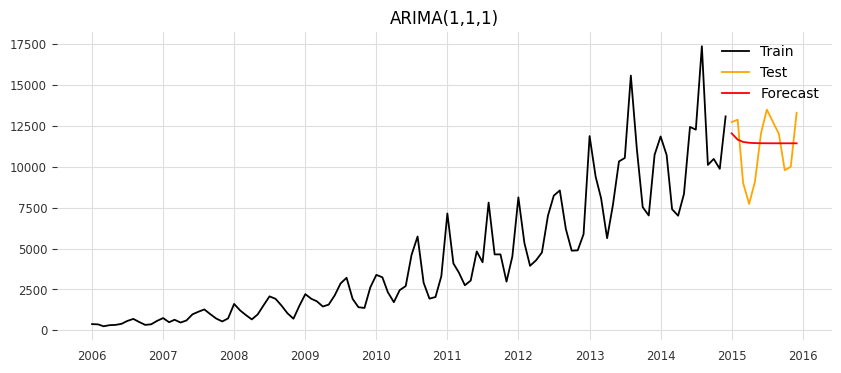

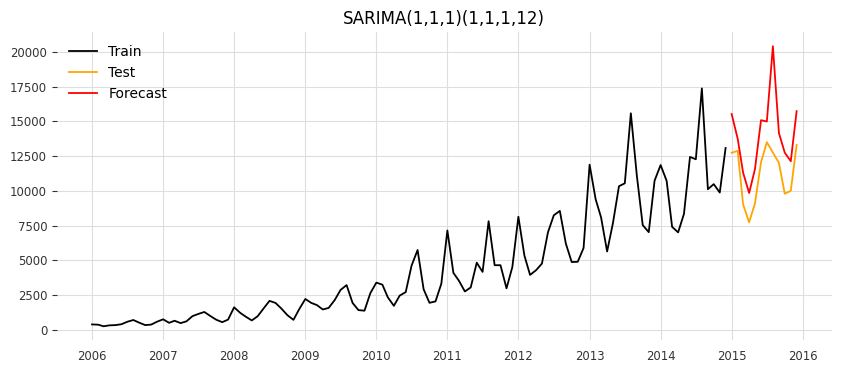

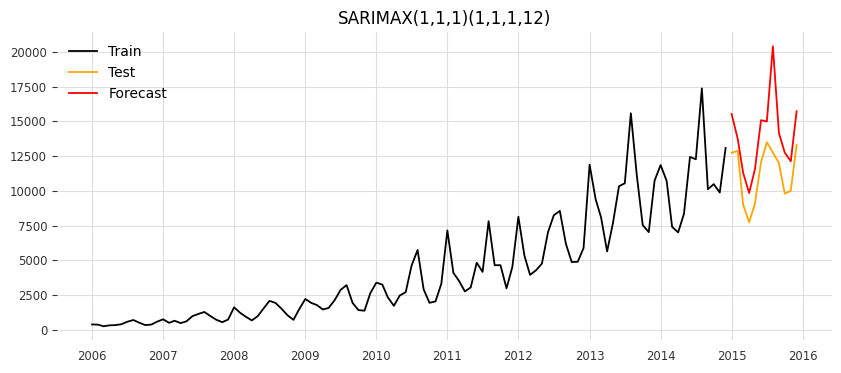

In [ ]:
# =======================
# 8. ARIMA
# =======================
arima_model = ARIMA(train, order=(1,1,1)).fit()
forecast_arima = arima_model.forecast(len(test))
mae, rmse = evaluate(test, forecast_arima)
results.append(["ARIMA(1,1,1)", mae, rmse])
plot_forecast(train, test, forecast_arima, "ARIMA(1,1,1)")

# =======================
# 9. SARIMA
# =======================
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
forecast_sarima = sarima_model.forecast(len(test))
mae, rmse = evaluate(test, forecast_sarima)
results.append(["SARIMA(1,1,1)(1,1,1,12)", mae, rmse])
plot_forecast(train, test, forecast_sarima, "SARIMA(1,1,1)(1,1,1,12)")

# =======================
# 10. SARIMAX
# =======================
sarimax_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12), exog=None).fit()
forecast_sarimax = sarimax_model.forecast(len(test))
mae, rmse = evaluate(test, forecast_sarimax)
results.append(["SARIMAX(1,1,1)(1,1,1,12)", mae, rmse])
plot_forecast(train, test, forecast_sarimax, "SARIMAX(1,1,1)(1,1,1,12)")


# A: Baseline & Naïve Methods

In [ ]:
# Use only the target column
y = df2['Bookings']

df = df2.asfreq('MS')  # Ensure monthly start frequency

# Train-test split: last 12 months for testing
train = y[:-12]
test = y[-12:]
df.head(3)

,Bookings
date,
2006-01-01,383
2006-02-01,366
2006-03-01,250


Mean Forecast: MAE = 7420.57, RMSE = 7913.35
Naïve Forecast: MAE = 2371.08, RMSE = 3069.01
Seasonal Naïve Forecast: MAE = 981.83, RMSE = 1158.95


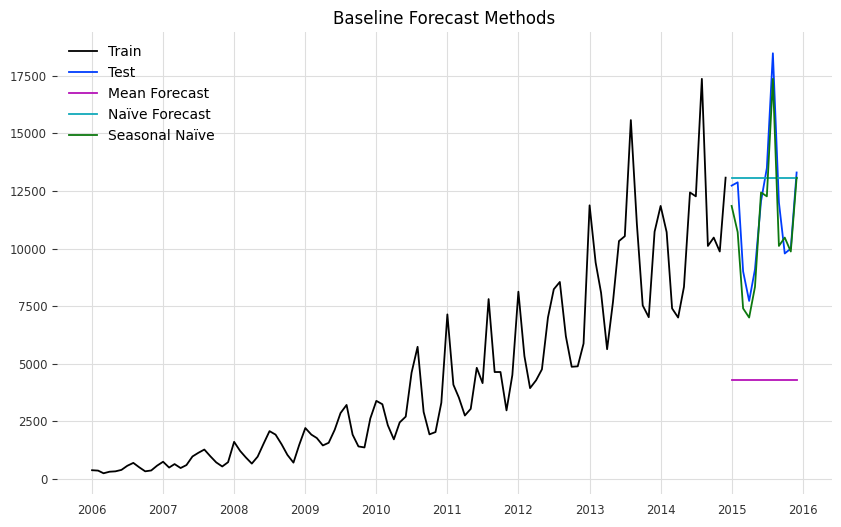

In [ ]:
# Function to evaluate models
def evaluate_forecast(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name}: MAE = {mae:.2f}, RMSE = {rmse:.2f}")
    return mae, rmse

# ===== 2. Mean Forecast =====
mean_forecast = pd.Series(train.mean(), index=test.index)
evaluate_forecast(test, mean_forecast, "Mean Forecast")

# ===== 3. Naïve Forecast (last value) =====
naive_forecast = pd.Series(train.iloc[-1], index=test.index)
evaluate_forecast(test, naive_forecast, "Naïve Forecast")

# ===== 4. Seasonal Naïve Forecast =====
# Assuming monthly data → season_length = 12
season_length = 12
seasonal_naive_forecast = pd.Series(
    [train.iloc[i % season_length - season_length] for i in range(len(test))],
    index=test.index
)
evaluate_forecast(test, seasonal_naive_forecast, "Seasonal Naïve Forecast")

# ===== 5. Plot =====
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(mean_forecast.index, mean_forecast, label='Mean Forecast')
plt.plot(naive_forecast.index, naive_forecast, label='Naïve Forecast')
plt.plot(seasonal_naive_forecast.index, seasonal_naive_forecast, label='Seasonal Naïve')
plt.legend()
plt.title("Baseline Forecast Methods")
plt.show()

# B: Classical Statistical Models

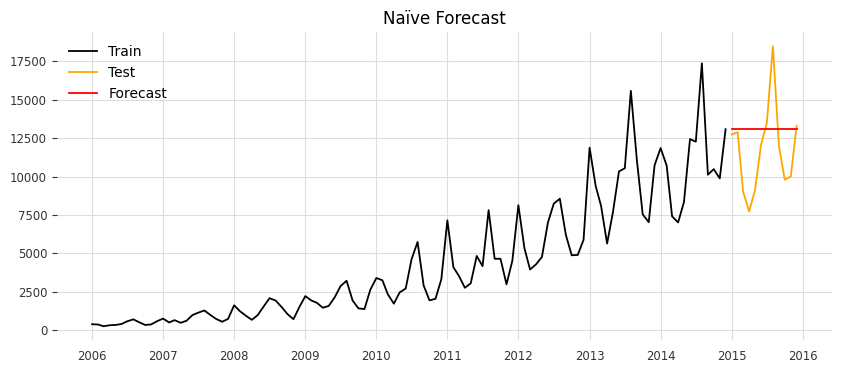

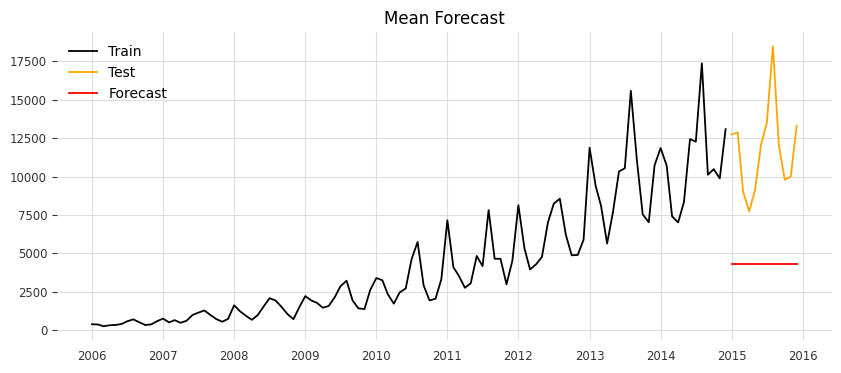

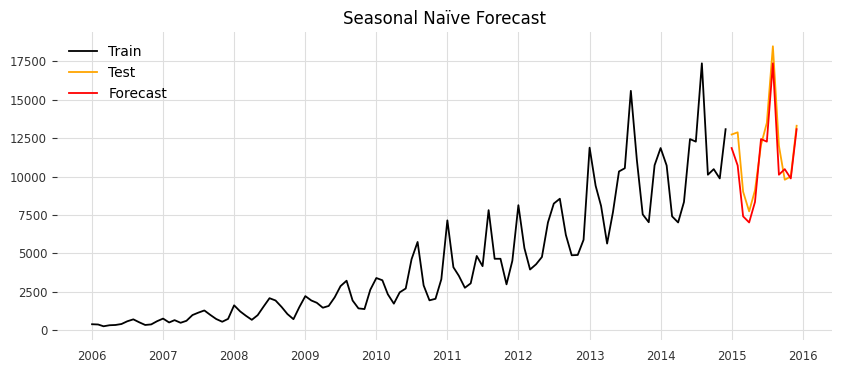

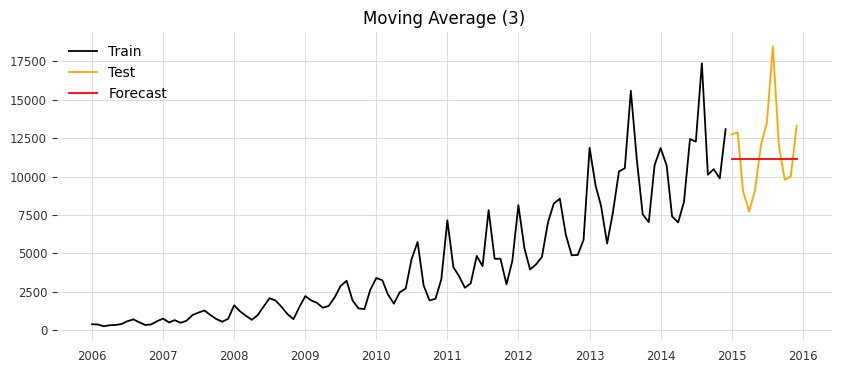

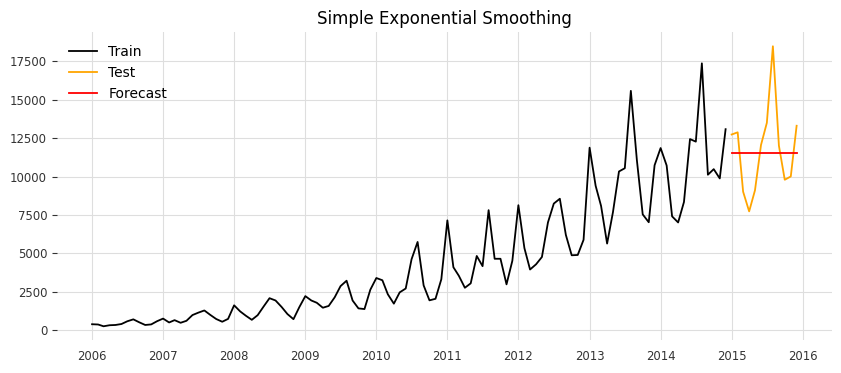

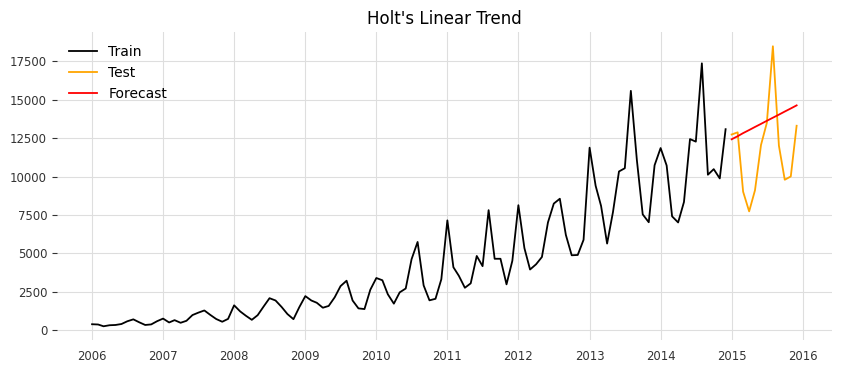

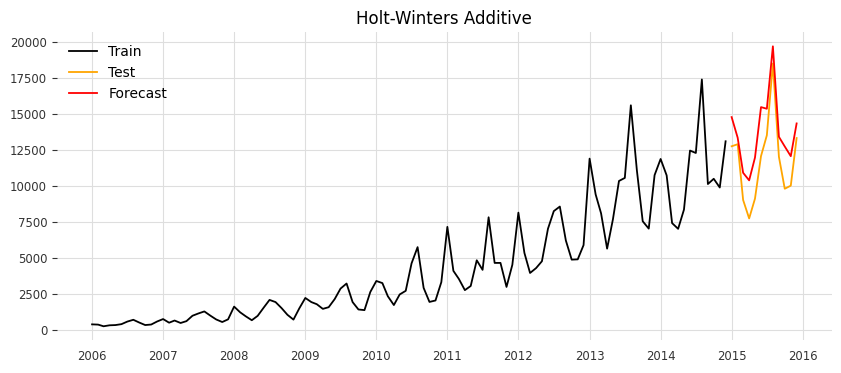

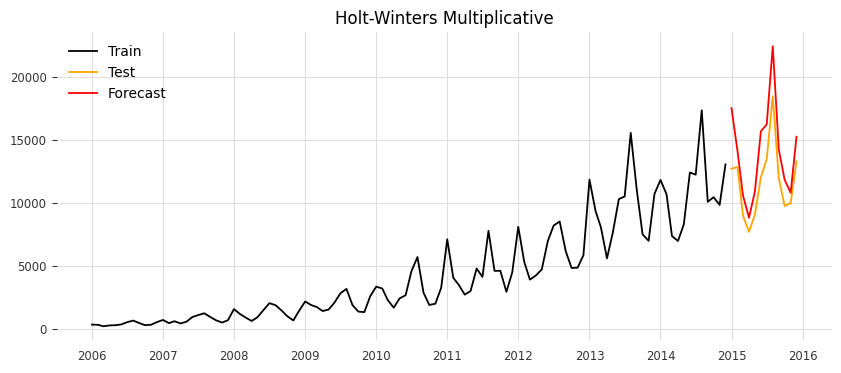

                          Model          MAE         RMSE
0                  ARIMA(1,1,1)  1666.366982  1884.668403
1       SARIMA(1,1,1)(1,1,1,12)  2697.688960  3136.541920
2      SARIMAX(1,1,1)(1,1,1,12)  2697.688960  3136.541920
3                         Naïve  2371.083333  3069.006177
4                          Mean  7420.574074  7913.354279
5                Seasonal Naïve   981.833333  1158.948158
6            Moving Average (3)  2251.861111  2807.525992
7                           SES  2188.715188  2755.564579
8           Holt's Linear Trend  2680.534167  3271.614457
9         Holt-Winters Additive  1971.306049  2140.922945
10  Holt-Winters Multiplicative  2339.641661  2618.312196


In [ ]:
# Use only the target column
y = df2['Bookings']

df = df2.asfreq('MS')  # Ensure monthly start frequency

# Train-test split: last 12 months for testing
train = y[:-12]
test = y[-12:]
df.head(3)
# =======================
# 2. Baseline Models
# =======================

# Naïve Forecast (last value)
forecast_naive = np.repeat(train.iloc[-1], len(test))
mae, rmse = evaluate(test, forecast_naive)
results.append(["Naïve", mae, rmse])
plot_forecast(train, test, forecast_naive, "Naïve Forecast")

# Mean Forecast
forecast_mean = np.repeat(train.mean(), len(test))
mae, rmse = evaluate(test, forecast_mean)
results.append(["Mean", mae, rmse])
plot_forecast(train, test, forecast_mean, "Mean Forecast")

# Seasonal Naïve (same month last year)
forecast_seasonal_naive = train.iloc[-12:].values
mae, rmse = evaluate(test, forecast_seasonal_naive)
results.append(["Seasonal Naïve", mae, rmse])
plot_forecast(train, test, forecast_seasonal_naive, "Seasonal Naïve Forecast")

# =======================
# 3. Moving Average
# =======================
window = 3
forecast_ma = np.repeat(train.rolling(window).mean().iloc[-1], len(test))
mae, rmse = evaluate(test, forecast_ma)
results.append(["Moving Average (3)", mae, rmse])
plot_forecast(train, test, forecast_ma, "Moving Average (3)")

# =======================
# 4. Simple Exponential Smoothing (SES)
# =======================
ses_model = SimpleExpSmoothing(train).fit()
forecast_ses = ses_model.forecast(len(test))
mae, rmse = evaluate(test, forecast_ses)
results.append(["SES", mae, rmse])
plot_forecast(train, test, forecast_ses, "Simple Exponential Smoothing")

# =======================
# 5. Holt’s Linear Trend
# =======================
holt_model = ExponentialSmoothing(train, trend='add').fit()
forecast_holt = holt_model.forecast(len(test))
mae, rmse = evaluate(test, forecast_holt)
results.append(["Holt's Linear Trend", mae, rmse])
plot_forecast(train, test, forecast_holt, "Holt's Linear Trend")

# =======================
# 6. Holt-Winters Additive
# =======================
hw_add_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
forecast_hw_add = hw_add_model.forecast(len(test))
mae, rmse = evaluate(test, forecast_hw_add)
results.append(["Holt-Winters Additive", mae, rmse])
plot_forecast(train, test, forecast_hw_add, "Holt-Winters Additive")

# =======================
# 7. Holt-Winters Multiplicative
# =======================
hw_mul_model = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=12).fit()
forecast_hw_mul = hw_mul_model.forecast(len(test))
mae, rmse = evaluate(test, forecast_hw_mul)
results.append(["Holt-Winters Multiplicative", mae, rmse])
plot_forecast(train, test, forecast_hw_mul, "Holt-Winters Multiplicative")


# =======================
# 11. Show Results Table
# =======================
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE"])
print(results_df)

# C: Machine Learning Models

In [ ]:
# Use only the target column
y = df2['Bookings']

df = df2.asfreq('MS')  # Ensure monthly start frequency

# Train-test split: last 12 months for testing
train = y[:-12]
test = y[-12:]
df.head(3)

,Bookings
date,
2006-01-01,383
2006-02-01,366
2006-03-01,250


In [ ]:
# === Prepare lag features ===
def create_lag_features(series, n_lags=12):
    df_lags = pd.DataFrame(series)
    for lag in range(1, n_lags + 1):
        df_lags[f'lag_{lag}'] = df_lags['Bookings'].shift(lag)
    df_lags.dropna(inplace=True)
    return df_lags

# Create lag features
df_lags = create_lag_features(df['Bookings'], n_lags=12)

In [ ]:
df_lags.head(30)

,Bookings,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
date,,,,,,,,,,,,,
2007-01-01,751,580.0,372.0,335.0,506.0,701.0,575.0,397.0,334.0,318.0,250.0,366.0,383.0
2007-02-01,498,751.0,580.0,372.0,335.0,506.0,701.0,575.0,397.0,334.0,318.0,250.0,366.0
2007-03-01,649,498.0,751.0,580.0,372.0,335.0,506.0,701.0,575.0,397.0,334.0,318.0,250.0
2007-04-01,478,649.0,498.0,751.0,580.0,372.0,335.0,506.0,701.0,575.0,397.0,334.0,318.0
2007-05-01,606,478.0,649.0,498.0,751.0,580.0,372.0,335.0,506.0,701.0,575.0,397.0,334.0
2007-06-01,980,606.0,478.0,649.0,498.0,751.0,580.0,372.0,335.0,506.0,701.0,575.0,397.0
2007-07-01,1137,980.0,606.0,478.0,649.0,498.0,751.0,580.0,372.0,335.0,506.0,701.0,575.0
2007-08-01,1280,1137.0,980.0,606.0,478.0,649.0,498.0,751.0,580.0,372.0,335.0,506.0,701.0
2007-09-01,987,1280.0,1137.0,980.0,606.0,478.0,649.0,498.0,751.0,580.0,372.0,335.0,506.0


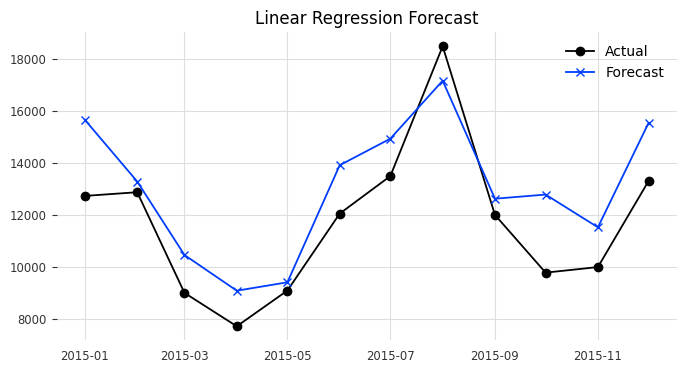

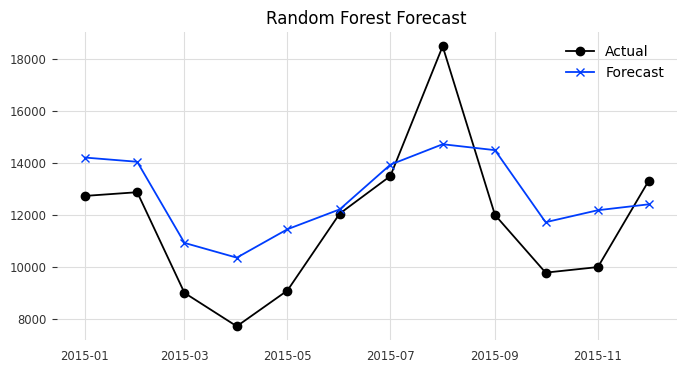

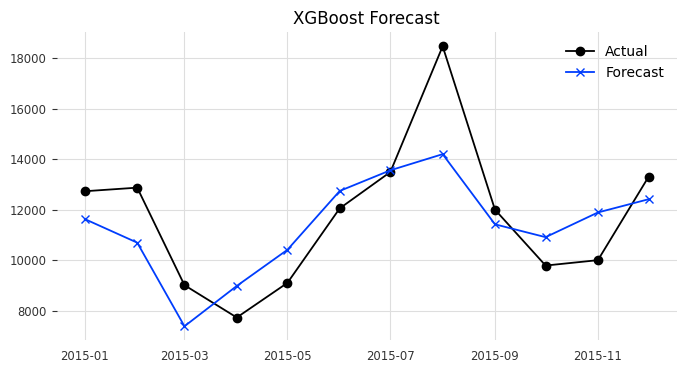

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 96, number of used features: 12
[LightGBM] [Info] Start training from score 4778.208333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

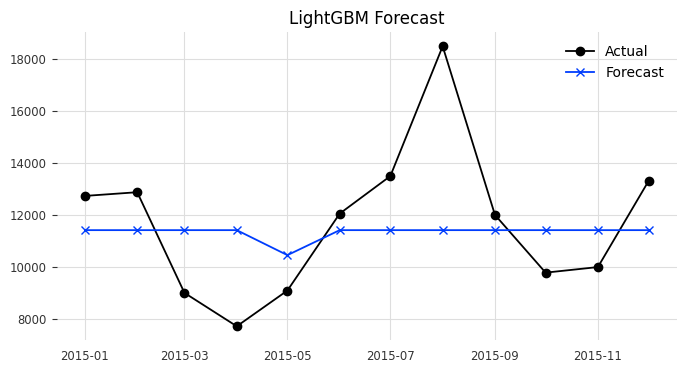

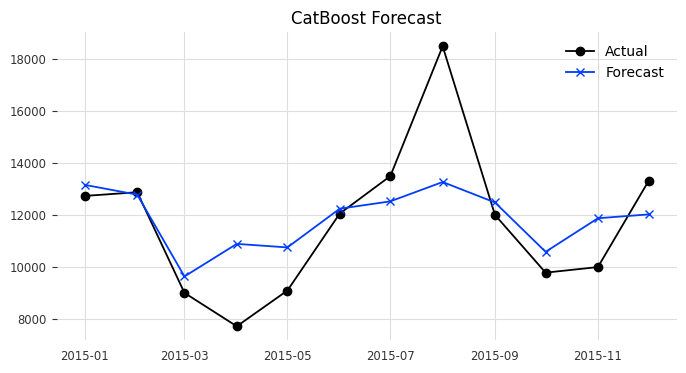

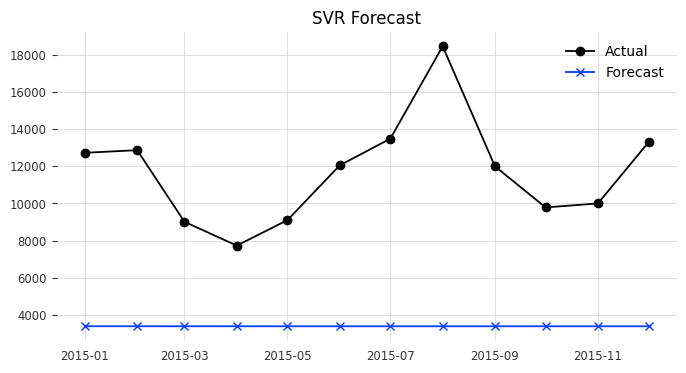

                           MAE          RMSE
Linear Regression  1537.914058  3.057677e+06
Random Forest      1783.643333  4.127615e+06
XGBoost            1416.120483  3.052670e+06
LightGBM           2125.867490  7.349128e+06
CatBoost           1396.956036  3.955478e+06
SVR                8335.410894  7.703598e+07


In [ ]:
# Split into train/test (last 12 months as test)
train = df_lags.iloc[:-12]
test = df_lags.iloc[-12:]

X_train, y_train = train.drop('Bookings', axis=1), train['Bookings']
X_test, y_test = test.drop('Bookings', axis=1), test['Bookings']

# === Models ===
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=200, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=200, random_state=42),
    "CatBoost": CatBoostRegressor(n_estimators=200, random_state=42, verbose=0),
    "SVR": SVR(kernel='rbf')
}

results = {}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds)

    results[name] = {"MAE": mae, "RMSE": rmse, "Predictions": preds}

    # Plot predictions vs actual
    plt.figure(figsize=(8,4))
    plt.plot(y_test.index, y_test, label='Actual', marker='o')
    plt.plot(y_test.index, preds, label='Forecast', marker='x')
    plt.title(f"{name} Forecast")
    plt.legend()
    plt.show()

# Show metrics
results_df = pd.DataFrame({k: {"MAE": v["MAE"], "RMSE": v["RMSE"]} for k, v in results.items()}).T
print(results_df)

# 5. D: Deep Learning Models

In [ ]:
# Use only the target column
y = df2['Bookings']

df = df2.asfreq('MS')  # Ensure monthly start frequency

# Train-test split: last 12 months for testing
train = y[:-12]
test = y[-12:]
df.head(3)

# ---------- Step 2: Create lagged features ----------
def create_lagged_data(series, n_lags=12):
    X, y = [], []
    for i in range(n_lags, len(series)):
        X.append(series[i-n_lags:i])
        y.append(series[i])
    return np.array(X), np.array(y)

n_lags = 12
train_values = train.values
test_values = test.values

In [ ]:
train_values

array([  383,   366,   250,   318,   334,   397,   575,   701,   506,
         335,   372,   580,   751,   498,   649,   478,   606,   980,
        1137,  1280,   987,   723,   545,   731,  1615,  1219,   940,
         670,   972,  1543,  2079,  1928,  1509,  1047,   712,  1492,
        2214,  1928,  1780,  1458,  1573,  2138,  2864,  3216,  1927,
        1415,  1371,  2629,  3392,  3246,  2334,  1723,  2458,  2709,
        4615,  5739,  2913,  1939,  2039,  3312,  7146,  4093,  3537,
        2757,  3045,  4827,  4163,  7811,  4644,  4645,  2980,  4515,
        8133,  5337,  3946,  4286,  4761,  7012,  8237,  8553,  6198,
        4872,  4892,  5880, 11878,  9398,  8083,  5634,  7675, 10328,
       10539, 15578, 11067,  7534,  7023, 10733, 11853, 10716,  7405,
        7009,  8340, 12437, 12269, 17367, 10116, 10479,  9874, 13080])

In [ ]:
test_values

array([12734, 12876,  9012,  7730,  9102, 12055, 13496, 18478, 12004,
        9789, 10003, 13304])

In [ ]:


# Train data
X_train, y_train = create_lagged_data(train_values, n_lags)
# Test data (prepend last part of train to generate first lags for test)
X_test, y_test = create_lagged_data(np.concatenate([train_values[-n_lags:], test_values]), n_lags)

# Reshape for RNN input [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# ---------- Step 3: Model training function ----------
def build_and_evaluate(model_type):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(50, activation='relu', input_shape=(n_lags, 1)))
    elif model_type == 'LSTM':
        model.add(LSTM(50, activation='relu', input_shape=(n_lags, 1)))
    elif model_type == 'GRU':
        model.add(GRU(50, activation='relu', input_shape=(n_lags, 1)))

    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

    preds = model.predict(X_test, verbose=0)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return mae, rmse

# ---------- Step 4: Evaluate ----------
results = {}
for model_type in ['RNN', 'LSTM', 'GRU']:
    mae, rmse = build_and_evaluate(model_type)
    results[model_type] = {"MAE": mae, "RMSE": rmse}

deep_results_df = pd.DataFrame(results).T
print(deep_results_df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


              MAE         RMSE
RNN   1441.939941  2114.533164
LSTM   962.778564  1148.346529
GRU   2375.402100  2899.430116


# E: Hybrid & Advanced

In [ ]:
# ----------------------------
# Prepare data
# ----------------------------
df2.index = pd.to_datetime(df2.index)
df2 = df2.asfreq('MS')
y = df2['Bookings']
train = y[:-12]
test = y[-12:]

results_E = {}

# ----------------------------
# 1. Facebook Prophet
# ----------------------------

prophet_df = train.reset_index()
prophet_df.columns = ['ds', 'y']

m = Prophet()
m.fit(prophet_df)

future = pd.DataFrame({'ds': test.index})
forecast = m.predict(future)
preds = forecast['yhat'].values

mae = mean_absolute_error(test, preds)
rmse = sqrt(mean_squared_error(test, preds))
results_E['Prophet'] = {"MAE": mae, "RMSE": rmse}

# ----------------------------
# 2. N-BEATS via Darts
# ----------------------------


series_train = TimeSeries.from_series(train)
series_test = TimeSeries.from_series(test)

nbeats = NBEATSModel(input_chunk_length=12, output_chunk_length=1, n_epochs=100, random_state=42)
nbeats.fit(series_train)
pred_series = nbeats.predict(len(series_test))

mae = mean_absolute_error(test, pred_series.values())
rmse = sqrt(mean_squared_error(test, pred_series.values()))
results_E['N-BEATS'] = {"MAE": mae, "RMSE": rmse}

'''
# ----------------------------
# 3. DeepAR (optional)
# ----------------------------
deepar = DeepARModel(input_chunk_length=12, output_chunk_length=1, n_epochs=50, random_state=42)
deepar.fit(series_train)
pred_series = deepar.predict(len(series_test))
mae = mean_absolute_error(test, pred_series.values())
rmse = sqrt(mean_squared_error(test, pred_series.values()))
results_E['DeepAR'] = {"MAE": mae, "RMSE": rmse}
'''

# ----------------------------
# 4. Temporal Fusion Transformer (optional)
# ----------------------------
tft = TFTModel(input_chunk_length=12, output_chunk_length=1, n_epochs=50, random_state=42, add_relative_index=True)
tft.fit(series_train)
pred_series = tft.predict(len(series_test))
mae = mean_absolute_error(test, pred_series.values())
rmse = sqrt(mean_squared_error(test, pred_series.values()))
results_E['TFT'] = {"MAE": mae, "RMSE": rmse}

# ----------------------------
# 5. Hybrid ARIMA + XGBoost
# ----------------------------

# Step 1: Fit ARIMA
arima_model = ARIMA(train, order=(1,1,1))
arima_res = arima_model.fit()

# Step 2: Get ARIMA residuals
train_pred = arima_res.predict(start=0, end=len(train)-1, typ='levels')
residuals = train - train_pred

# Step 3: Train ML model on residuals with lag features
def create_lags(series, n_lags=12):
    X, y = [], []
    for i in range(n_lags, len(series)):
        X.append(series[i-n_lags:i])
        y.append(series[i])
    return np.array(X), np.array(y)

X_train_res, y_train_res = create_lags(residuals.values, 12)

xgb = XGBRegressor(n_estimators=200, random_state=42)
xgb.fit(X_train_res, y_train_res)

# Step 4: Predict ARIMA + residual forecast
arima_forecast = arima_res.forecast(steps=len(test))
last_train = residuals.values[-12:]
X_test_res = [last_train]
for i in range(len(test)-1):
    X_test_res.append(np.append(X_test_res[-1][1:], 0))
X_test_res = np.array(X_test_res)

residual_forecast = xgb.predict(X_test_res)
hybrid_forecast = arima_forecast.values + residual_forecast

mae = mean_absolute_error(test, hybrid_forecast)
rmse = sqrt(mean_squared_error(test, hybrid_forecast))
results_E['Hybrid_ARIMA+XGB'] = {"MAE": mae, "RMSE": rmse}

# ----------------------------
# Results
# ----------------------------
results_E_df = pd.DataFrame(results_E).T
print(results_E_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpozwg_7_9/4bwfot14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpozwg_7_9/dpauegix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60175', 'data', 'file=/tmp/tmpozwg_7_9/4bwfot14.json', 'init=/tmp/tmpozwg_7_9/dpauegix.json', 'output', 'file=/tmp/tmpozwg_7_9/prophet_modelj2brm701/prophet_model-20250816023245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:32:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:pytorch_lightning.utilities.rank_ze

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0      | train
4  | encoder_vsn                       | _VariableSelectionNetwork        | 1.2 K  | train
5  | decoder_vsn                       | _VariableSelectionNetwork   

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                           MAE          RMSE
Prophet            1817.137946   2157.201957
N-BEATS            4085.745227   4403.457986
TFT               11710.861042  12029.103960
Hybrid_ARIMA+XGB   2040.784017   2646.386686
